Saving data.csv to data (1).csv


<ipython-input-2-64b7ace25eb4>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['TOPSIS Score'], y=df_sorted.iloc[:, 0], palette="viridis")


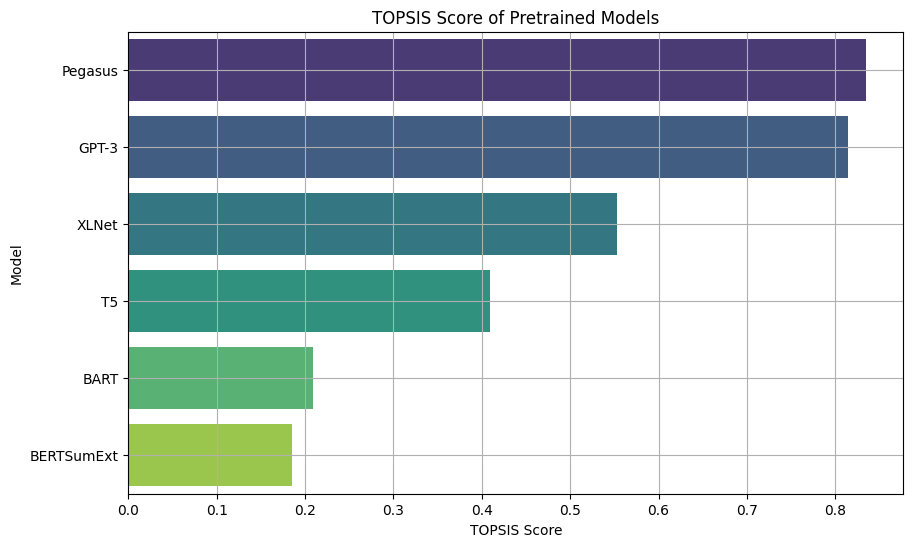

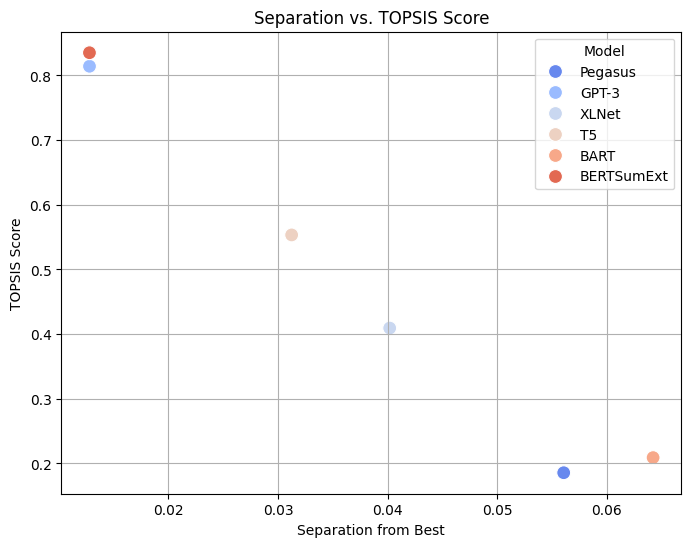

<ipython-input-2-64b7ace25eb4>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['Rank'], y=df_sorted.iloc[:, 0], palette="Blues_r")


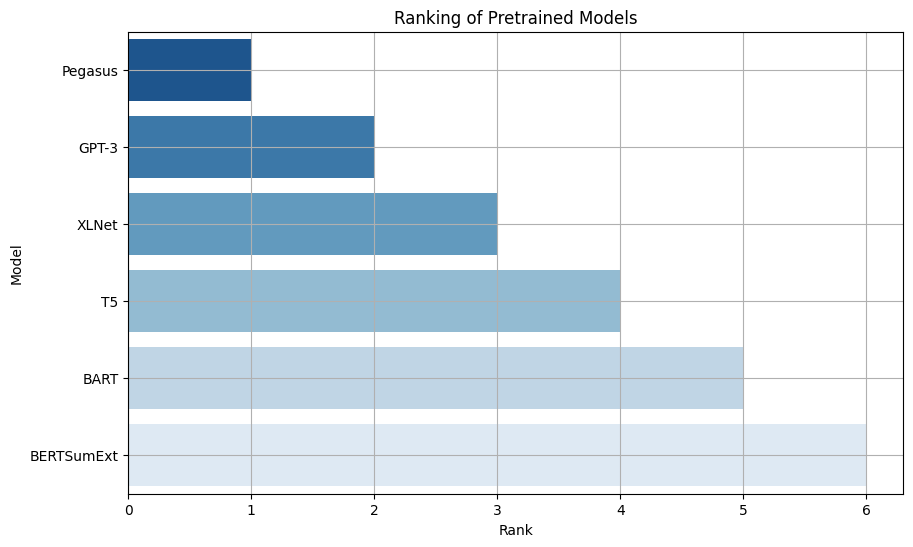

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload dataset
uploaded = files.upload()

# Read the uploaded CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Extract model names and criteria
model_names = df.iloc[:, 0]  # First column is model names
criteria_matrix = df.iloc[:, 1:].values.astype(float)  # Convert criteria to numerical format

# Step 3: Normalize the decision matrix
norm_matrix = criteria_matrix / np.linalg.norm(criteria_matrix, axis=0)

# Step 4: Define weights (equal weightage assumed)
num_criteria = norm_matrix.shape[1]
weights = np.ones(num_criteria) / num_criteria  # Equal weights

# Step 5: Compute weighted normalized matrix
weighted_matrix = norm_matrix * weights

# Step 6: Determine ideal (best) and anti-ideal (worst) solutions
ideal_solution = np.max(weighted_matrix, axis=0)
anti_ideal_solution = np.min(weighted_matrix, axis=0)

# Step 7: Compute separation measures
separation_best = np.sqrt(np.sum((weighted_matrix - ideal_solution) ** 2, axis=1))
separation_worst = np.sqrt(np.sum((weighted_matrix - anti_ideal_solution) ** 2, axis=1))

# Step 8: Compute TOPSIS score
topsis_score = separation_worst / (separation_best + separation_worst)

# Step 9: Rank models based on TOPSIS score
df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

# Sort models by rank
df_sorted = df.sort_values(by='TOPSIS Score', ascending=False)

# Step 10: Generate and Save Plots
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sorted['TOPSIS Score'], y=df_sorted.iloc[:, 0], palette="viridis")
plt.xlabel("TOPSIS Score")
plt.ylabel("Model")
plt.title("TOPSIS Score of Pretrained Models")
plt.grid()
plt.savefig("topsis_scores.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=separation_best, y=topsis_score, hue=df_sorted.iloc[:, 0], palette="coolwarm", s=100)
plt.xlabel("Separation from Best")
plt.ylabel("TOPSIS Score")
plt.title("Separation vs. TOPSIS Score")
plt.grid()
plt.savefig("separation_vs_topsis.png")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_sorted['Rank'], y=df_sorted.iloc[:, 0], palette="Blues_r")
plt.xlabel("Rank")
plt.ylabel("Model")
plt.title("Ranking of Pretrained Models")
plt.grid()
plt.savefig("model_ranking.png")
plt.show()

# Save results
df_sorted.to_csv("TOPSIS_results.csv", index=False)
files.download("TOPSIS_results.csv")

# Download plots
files.download("topsis_scores.png")
files.download("separation_vs_topsis.png")
files.download("model_ranking.png")
